#Pasos del Preprocesamiento

1. Carga del dataset.

2. **Exploración inicial** (análisis de estructura, valores faltantes, estadísticas descriptivas).

3. **Limpieza de datos** (manejo de valores faltantes, eliminación de columnas irrelevantes, etc.).

4. **Transformación de datos** (codificación de variables categóricas, normalización, etc.).



##Ejemplo Titanic
[ Link del dataset](https://www.kaggle.com/c/titanic/data)


Primeras filas del dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450 

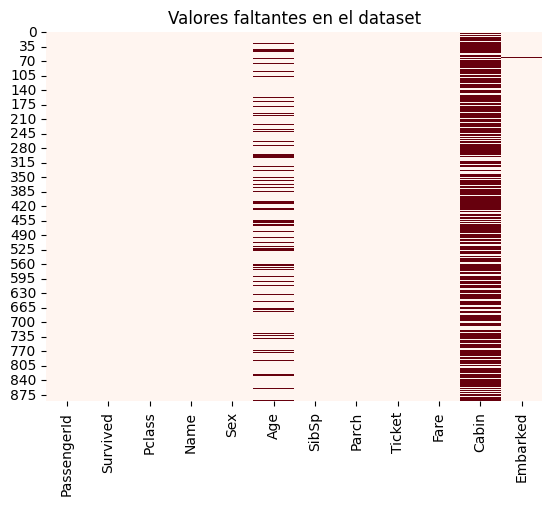


Valores faltantes después de la limpieza:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Dataset después de la limpieza y transformación:
   Survived  Pclass   Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0 -0.502445      True       False   
1         1       1  38.0      1      0  0.786845     False       False   
2         1       3  26.0      0      0 -0.488854     False       False   
3         1       1  35.0      1      0  0.420730     False       False   
4         0       3  35.0      0      0 -0.486337      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Para graficas mas enriquecidas

# 1. Cargar el dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# 2. Exploración inicial
print("Primeras filas del dataset:")
print(df.head())

print("\nInformación del dataset:")
print(df.info())

print("\nEstadísticas descriptivas:")
print(df.describe())

print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Visualización de valores faltantes
sns.heatmap(df.isnull(), cbar=False, cmap="Reds")
plt.title("Valores faltantes en el dataset")
plt.show()

# 3. Limpieza de datos
# Eliminar columnas irrelevantes para el analisis que se desea realizar
df.drop(columns=["Cabin", "PassengerId", "Ticket", "Name"], inplace=True)

# Manejo de valores faltantes
# Para la columna 'Age', agrgamos los valores faltantes con la mediana

df["Age"]=df["Age"].fillna(df["Age"].median())

# Para la columna 'Embarked', imputamos la moda (valor más frecuente)
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])

# Verificar si aún hay valores faltantes
print("\nValores faltantes después de la limpieza:")
print(df.isnull().sum())

# 4. Transformación de datos
# Codificación de variables categóricas (Sex y Embarked)
df = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)

# Normalización de la columna 'Fare' (opcional)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df["Fare"] = scaler.fit_transform(df[["Fare"]])

# Resultado final
print("\nDataset después de la limpieza y transformación:")
print(df.head())

#Actividad Preprocesamiento Avanzado del Titanic Dataset

**Objetivo**:
Aplicar técnicas avanzadas de preprocesamiento para preparar el dataset y mejorar el rendimiento de un modelo de machine learning.

Pasos de la Actividad:
1. Carga y Exploración Inicial
Carga el dataset y realiza una exploración inicial (esto ya lo hicimos en el ejemplo anterior, pero puedes repetirlo para refrescar).


2. Manejo de Outliers
Identifica y maneja outliers en las columnas numéricas (Age, Fare, SibSp, Parch).

  * Usamos la regla del [IQR](https://drive.google.com/file/d/1AFYSfiASNZQhSRyiDmEaIqgDX6ouFkQb/view?usp=sharing) para detectar outliers en las columnas Age y Fare.

  * Los outliers se imputan con la mediana para reducir su impacto sin eliminarlos completamente.


3. Feature Engineering
Crea nuevas características (features) a partir de las existentes para mejorar el modelo.

  * `FamilySize`: Combina SibSp (hermanos/cónyuges) y Parch (padres/hijos) para crear una nueva característica que representa el tamaño de la familia.

  * `IsAlone`: Indica si el pasajero viaja solo (útil para análisis posteriores).

  * `AgeGroup`: Divide la edad en grupos (niño, adolescente, adulto joven, etc.) para capturar patrones relacionados con la edad.


4. Balanceo de Clases
Aplica técnicas para manejar el desequilibrio de clases en la columna Survived.

  * La columna Survived está desequilibrada (más pasajeros no sobrevivieron que sobrevivieron).

  * Usamos oversampling (sobremuestreo) para balancear las clases, duplicando aleatoriamente muestras de la clase minoritaria (Survived = 1).

5. Conclusión
Guarda el dataset preprocesado para su uso en un modelo de machine learning.

  * El dataset final se guarda en un archivo CSV para su uso en un modelo de machine learning.